In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

from wordcloud import WordCloud,STOPWORDS
import jieba
import matplotlib.pyplot as plt

- 从CSV文件中导入数据

In [2]:
data = pd.read_csv('datasets/dianping.csv')
data.head()

,comment,star
0,口味：不知道是我口高了，还是这家真不怎么样。??我感觉口味确实很一般很一般。上菜相当快，我敢...,2
1,菜品丰富质量好，服务也不错！很喜欢！,4
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,2
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,5
4,先说我算是娜娜家风荷园开业就一直在这里吃??每次出去回来总想吃一回??有时觉得外面的西式简餐...,4


* 数据预处理：通过star属性，准备sentiment属性

In [3]:
def make_label(star):
    if star > 3:
        return 1
    else:
        return 0
    
data['sentiment'] = data.star.apply(make_label)
data = data[['comment' , 'sentiment']]
data.head()

,comment,sentiment
0,口味：不知道是我口高了，还是这家真不怎么样。??我感觉口味确实很一般很一般。上菜相当快，我敢...,0
1,菜品丰富质量好，服务也不错！很喜欢！,1
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1
4,先说我算是娜娜家风荷园开业就一直在这里吃??每次出去回来总想吃一回??有时觉得外面的西式简餐...,1


* 简单使用snownlp包进行情感分析
  - 优点：简单方便，即调即用
  - 缺点：不结合具体数据集，准确率不高

In [4]:
from snownlp import SnowNLP

text1 = '这个东西不错'
text2 = '这个东西很垃圾'

s1 = SnowNLP(text1)
s2 = SnowNLP(text2)

print(s1.sentiments,s2.sentiments)

def snow_result(comemnt):
    s = SnowNLP(comemnt)
    if s.sentiments >= 0.6:
        return 1
    else:
        return 0
    
data['snlp_result'] = data.comment.apply(snow_result)
data.head()

0.8623218777387431 0.21406279508712744


,comment,sentiment,snlp_result
0,口味：不知道是我口高了，还是这家真不怎么样。??我感觉口味确实很一般很一般。上菜相当快，我敢...,0,0
1,菜品丰富质量好，服务也不错！很喜欢！,1,1
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0,1
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1,0
4,先说我算是娜娜家风荷园开业就一直在这里吃??每次出去回来总想吃一回??有时觉得外面的西式简餐...,1,0


* 简单版分词

In [4]:
def simple_word_cut (texts):
    return ','.join(jieba.cut(texts, cut_all=False))

data['simple_cut_comment'] = data.comment.apply(simple_word_cut)
data.head()

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/8d/62lh93xj5lv9v1r3f8qg6m6r0000gn/T/jieba.cache
Loading model cost 1.168 seconds.
Prefix dict has been built succesfully.


,comment,sentiment,simple_cut_comment
0,口味：不知道是我口高了，还是这家真不怎么样。??我感觉口味确实很一般很一般。上菜相当快，我敢...,0,"口味,：,不,知道,是,我口,高,了,，,还是,这家,真,不怎么样,。,?,?,我,感觉,口..."
1,菜品丰富质量好，服务也不错！很喜欢！,1,"菜品,丰富,质量,好,，,服务,也,不错,！,很,喜欢,！"
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0,"说真的,，,不,晓得,有人,排队,的,理由,，,香精,香精,香精,香精,，,拜拜,！"
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1,"菜量,实惠,，,上菜,还,算,比较,快,，,疙瘩汤,喝出,了,秋日,的,暖意,，,烧茄子,吃..."
4,先说我算是娜娜家风荷园开业就一直在这里吃??每次出去回来总想吃一回??有时觉得外面的西式简餐...,1,"先说,我,算是,娜娜,家风,荷园,开业,就,一直,在,这里,吃,?,?,每次,出去,回来,总..."


In [5]:


def word_cut (texts):
    words_list = []
    word_generator = jieba.cut(texts, cut_all=False)  # 返回的是一个迭代器
    with open('hit_stopwords.txt') as f:
        str_text = f.read()
    for word in word_generator:
        if word.strip() not in str_text:
            words_list.append(word)
            #print ('1')
    return ' '.join(words_list)  # 注意是空格

data['cut_comment'] = data.comment.apply(word_cut)

data.head()

,comment,sentiment,simple_cut_comment,cut_comment
0,口味：不知道是我口高了，还是这家真不怎么样。??我感觉口味确实很一般很一般。上菜相当快，我敢...,0,口味/：/不/知道/是/我口/高/了/，/还是/这家/真/不怎么样/。/?/?/我/感觉/口...,口味 知道 我口 高 这家 不怎么样 感觉 口味 确实 很 很 上菜 相当 快 我敢 菜 都...
1,菜品丰富质量好，服务也不错！很喜欢！,1,菜品/丰富/质量/好/，/服务/也/不错/！/很/喜欢/！,菜品 丰富 质量 服务 不错 很 喜欢
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0,说真的/，/不/晓得/有人/排队/的/理由/，/香精/香精/香精/香精/，/拜拜/！,说真的 晓得 有人 排队 理由 香精 香精 香精 香精 拜拜
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1,菜量/实惠/，/上菜/还/算/比较/快/，/疙瘩汤/喝出/了/秋日/的/暖意/，/烧茄子/吃...,菜量 实惠 上菜 算 比较 快 喝出 秋日 暖意 烧茄子 吃 出 大阪 烧 味道 想 吃 土...
4,先说我算是娜娜家风荷园开业就一直在这里吃??每次出去回来总想吃一回??有时觉得外面的西式简餐...,1,先说/我/算是/娜娜/家风/荷园/开业/就/一直/在/这里/吃/?/?/每次/出去/回来/总...,先说 算是 娜娜 家风 荷园 开业 吃 每次 出去 回来 总想 吃 一回 有时 觉得 外面 ...


Positive words


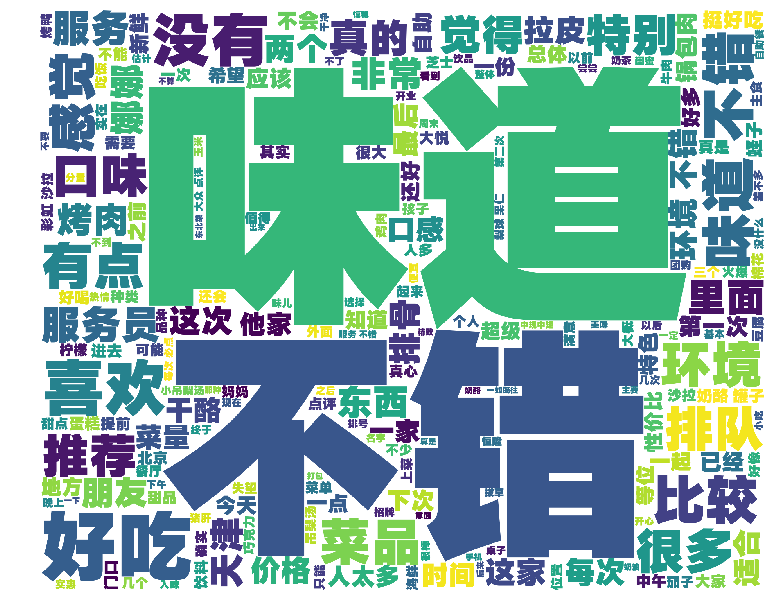

In [6]:
def draw_wordcloud (words, color = 'white'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                      font_path="HYQiHei-105.ttf",
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")

data_pos = data[ data['sentiment'] == 1 ]
words_pos = ' '.join(data_pos['cut_comment'])
draw_wordcloud (words_pos)


Negtive words


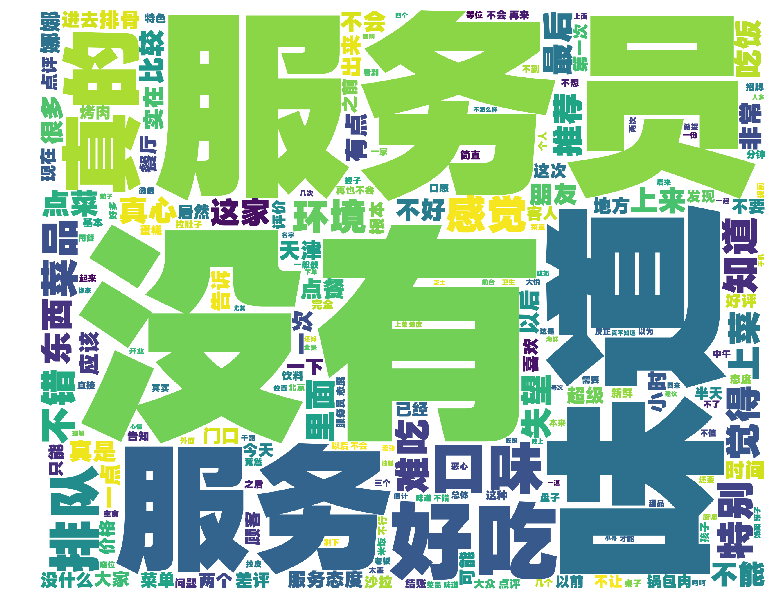

In [7]:
print("Negtive words")

data_neg = data [data['sentiment'] == 0]
words_neg = ' '.join(data_neg['cut_comment'])
draw_wordcloud (words_neg)

In [6]:
X = data['cut_comment']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_df = 0.8, 
                       min_df = 3, 
                       token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b'
                      )

features = pd.DataFrame(vect.fit_transform(X_train).toarray(), columns=vect.get_feature_names())
features.head()

,ipad,ok,ps,wifi,一下,一个个,一个半,一个多,一人,一份,...,麻将,麻烦,麻辣,麻酱,黄瓜,黄盖,黏糊糊,黑椒,默默,齐全
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

X_train_vect = vect.fit_transform(X_train)
nb.fit(X_train_vect, y_train)

train_accuracy = nb.score(X_train_vect, y_train)
print (train_accuracy)

0.915625


In [14]:
X_test_vect = vect.transform(X_test)
test_accuracy = nb.score(X_test_vect, y_test)

y_predict = nb.predict(X_test_vect)

print('测试准确率', test_accuracy)

from sklearn.metrics import classification_report
print("测试集上其他指标：\n",classification_report(y_test, y_predict))

测试准确率 0.82
测试集上其他指标：
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       197
           1       0.79      0.87      0.83       203

   micro avg       0.82      0.82      0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [15]:
X_vec = vect.transform(X)
nb_result = nb.predict(X_vec)
data['nb_result'] = nb_result

data.head()

,comment,sentiment,simple_cut_comment,cut_comment,nb_result
0,口味：不知道是我口高了，还是这家真不怎么样。??我感觉口味确实很一般很一般。上菜相当快，我敢...,0,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 ? ? 我 感觉 口...,口味 知道 我口 高 这家 不怎么样 感觉 口味 确实 很 很 上菜 相当 快 我敢 菜 都...,0
1,菜品丰富质量好，服务也不错！很喜欢！,1,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！,菜品 丰富 质量 服务 不错 很 喜欢,1
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！,说真的 晓得 有人 排队 理由 香精 香精 香精 香精 拜拜,0
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...,菜量 实惠 上菜 算 比较 快 疙瘩汤 喝出 秋日 暖意 烧茄子 吃 出 大阪 烧 味道 想...,1
4,先说我算是娜娜家风荷园开业就一直在这里吃??每次出去回来总想吃一回??有时觉得外面的西式简餐...,1,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 ? ? 每次 出去 回来 总...,先说 算是 娜娜 家风 荷园 开业 吃 每次 出去 回来 总想 吃 一回 有时 觉得 外面 ...,0


In [25]:
nb_probs = nb.predict_proba (X_vec)
print (nb_probs[0:5])

[[9.95627063e-01 4.37293745e-03]
 [2.67817480e-02 9.73218252e-01]
 [8.55362819e-01 1.44637181e-01]
 [2.20139799e-04 9.99779860e-01]
 [9.91606446e-01 8.39355372e-03]]


In [38]:
import math

def show_most_informative_features(vectorizer, clf, n=20):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print ("\t%.4f\t%-15s\t\t%.4f\t%-15s" % (math.exp(coef_1), fn_1, math.exp(coef_2), fn_2))

show_most_informative_features(vect, nb)

	0.0001	wifi           		0.0320	不错             
	0.0001	一副             		0.0285	味道             
	0.0001	一句             		0.0192	好吃             
	0.0001	一吃             		0.0108	环境             
	0.0001	一声             		0.0103	没有             
	0.0001	一大半            		0.0103	喜欢             
	0.0001	一根             		0.0085	排队             
	0.0001	一点儿            		0.0084	菜品             
	0.0001	一脸             		0.0080	比较             
	0.0001	一身             		0.0079	感觉             
	0.0001	一轮             		0.0076	推荐             
	0.0001	七个             		0.0075	有点             
	0.0001	上吐下泻           		0.0073	口味             
	0.0001	上当             		0.0070	很多             
	0.0001	上楼             		0.0060	觉得             
	0.0001	不上             		0.0059	服务             
	0.0001	不下             		0.0054	特别             
	0.0001	不去             		0.0054	服务员            
	0.0001	不差             		0.0052	真的             
	0.0001	不带             		0.0047	非常             
	0.0001	不敢             		0.0045	里面      

In [53]:
str = ['饭菜 不好']
str_vec = vect.transform (str)
str_predict = nb.predict(str_vec)
print (str, str_predict)

['饭菜 不好'] [0]
